In [ ]:
# Set file paths and display column headers.

import pandas as pd
import os

# Define the path to the project folder and the CSV file
project_folder = r"C:\Users\Joey\PycharmProjects\Rename_Session.xml"
csv_file = os.path.join(project_folder, "pitch_data.csv")

# Check if the file exists
if os.path.exists(csv_file):
    # Load the CSV file
    df = pd.read_csv(csv_file)
    
    # Display column headers
    print("Column Headers:")
    print(df.columns.tolist())
else:
    print(f"File '{csv_file}' not found. Please check the path or file name.")


In [4]:
# creates simulated data for practice

import pandas as pd
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic data
num_players = 50
num_pitches = 200

data = {
    "Player_ID": np.random.choice([f"Player_{i}" for i in range(1, num_players + 1)], num_pitches),
    "Pitch_Type": np.random.choice(["Fastball", "Slider", "Curveball", "Changeup"], num_pitches),
    "Pitch_Velocity": np.random.normal(90, 5, num_pitches),  # Avg velocity 90 mph, std 5
    "Spin_Rate": np.random.normal(2200, 200, num_pitches),  # Avg spin rate 2200 RPM, std 200
    "Fatigue_Index": np.random.randint(0, 100, num_pitches),
    "Injury_Risk": np.random.choice([0, 1], num_pitches, p=[0.8, 0.2])  # 20% risk of injury
}

# Add a trend: Fatigue decreases velocity and spin rate
data["Pitch_Velocity"] -= data["Fatigue_Index"] * 0.05
data["Spin_Rate"] -= data["Fatigue_Index"] * 2

# Create DataFrame
df = pd.DataFrame(data)

# Save to CSV
csv_path = r"C:\Users\Joey\PycharmProjects\Rename_Session.xml\pitch_data.csv"
df.to_csv(csv_path, index=False)

print(f"Dataset created at {csv_path}")


Dataset created at C:\Users\Joey\PycharmProjects\Rename_Session.xml\pitch_data.csv


In [1]:
# created another simulated data set

import pandas as pd
import numpy as np
import os

# Define the project path
project_path = r"C:\Users\Joey\PycharmProjects\Rename_Session.xml"
data_path = os.path.join(os.path.dirname(project_path), "pitch_data.csv")
os.makedirs(data_path, exist_ok=True)

# Simulated biomechanics data
np.random.seed(42)
data = {
    "Player_ID": np.arange(1, 101),
    "Game_Speed": np.random.uniform(20, 30, 100),
    "Pitch_Velocity": np.random.uniform(70, 100, 100),
    "Injury_Risk_Score": np.random.uniform(0, 1, 100),
    "Acceleration": np.random.uniform(2, 5, 100),
    "Deceleration": np.random.uniform(-5, -1, 100),
}

# Save the data to CSV
df = pd.DataFrame(data)
csv_file = os.path.join(data_path, "biomechanics_data.csv")
df.to_csv(csv_file, index=False)
print(f"Mock data saved to {csv_file}")


Mock data saved to C:\Users\Joey\PycharmProjects\data\biomechanics_data.csv


Data Overview:
   Player_ID Pitch_Type  Pitch_Velocity    Spin_Rate  Fatigue_Index  \
0  Player_39  Curveball       89.978337  1906.055632             63   
1  Player_29  Curveball       85.014212  2052.121471             14   
2  Player_15     Slider       83.245538  1719.220855             28   
3  Player_43   Changeup       90.812362  2030.848996             32   
4   Player_8   Changeup       84.232686  1862.173468             93   

   Injury_Risk  
0            0  
1            0  
2            0  
3            0  
4            0  

Missing Values:
Player_ID         0
Pitch_Type        0
Pitch_Velocity    0
Spin_Rate         0
Fatigue_Index     0
Injury_Risk       0
dtype: int64


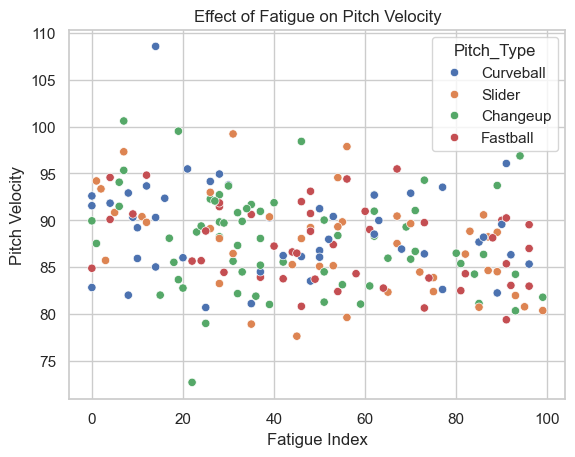


Data Summary:
       Pitch_Velocity    Spin_Rate  Fatigue_Index  Injury_Risk
count      200.000000   200.000000      200.00000   200.000000
mean        87.954298  2085.441685       47.68000     0.200000
std          4.945678   219.884466       28.36442     0.401004
min         72.693663  1521.671100        0.00000     0.000000
25%         84.464799  1918.023304       26.00000     0.000000
50%         88.070099  2083.455728       46.00000     0.000000
75%         90.960622  2247.044992       71.00000     0.000000
max        108.563657  2723.776162       99.00000     1.000000


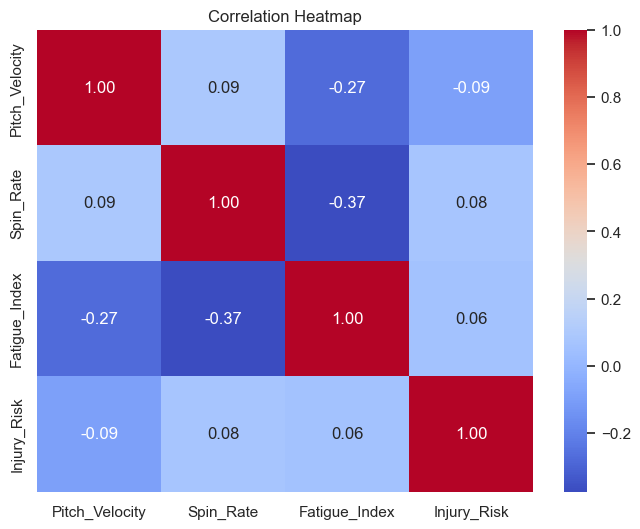


Insights:
1. Look for trends between pitch velocity and injury risk.
2. Identify high-risk players (e.g., Injury Risk Score > 0.8).
3. Highlight acceleration and deceleration trends.


In [9]:
# accounts for empty cells, analyzes and visualizes data

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Load the data
data_path = r"C:\Users\Joey\PycharmProjects\Rename_Session.xml\pitch_data.csv"
df = pd.read_csv(data_path)

# Display the first few rows of the data
print("Data Overview:")
print(df.head())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Scatterplot: Fatigue Index vs. Pitch Velocity
if "Fatigue_Index" in df.columns and "Pitch_Velocity" in df.columns:
    sns.scatterplot(data=df, x="Fatigue_Index", y="Pitch_Velocity", hue="Pitch_Type")
    plt.title("Effect of Fatigue on Pitch Velocity")
    plt.xlabel("Fatigue Index")
    plt.ylabel("Pitch Velocity")
    plt.show()

# Data Statistics
print("\nData Summary:")
print(df.describe())

# Distribution of a numeric column (e.g., Game_Speed)
if "Game_Speed" in df.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df["Game_Speed"], kde=True, bins=20, color="blue")
    plt.title("Distribution of Game Speeds")
    plt.xlabel("Game Speed")
    plt.ylabel("Frequency")
    plt.show()

# Scatterplot: Pitch Velocity vs. Injury Risk Score
if "Pitch_Velocity" in df.columns and "Injury_Risk_Score" in df.columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(
        data=df,
        x="Pitch_Velocity",
        y="Injury_Risk_Score",
        hue="Acceleration",
        palette="viridis"
    )
    plt.title("Pitch Velocity vs. Injury Risk Score")
    plt.xlabel("Pitch Velocity")
    plt.ylabel("Injury Risk Score")
    plt.colorbar()
    plt.show()

# Correlation Heatmap (only numeric columns)
numeric_df = df.select_dtypes(include=["number"])  # Select only numeric columns
if not numeric_df.empty:
    plt.figure(figsize=(8, 6))
    sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Correlation Heatmap")
    plt.show()
else:
    print("\nNo numeric columns found for correlation heatmap.")

# Insights
print("\nInsights:")
print("1. Look for trends between pitch velocity and injury risk.")
print("2. Identify high-risk players (e.g., Injury Risk Score > 0.8).")
print("3. Highlight acceleration and deceleration trends.")
